#**Credit Risk Assessment**
* Created by Naufal Fauzan
* Final project of VIX in ID/X Partners

#**Business Understanding**
The task is to build a model that can predict credit risk using a dataset provided by the company consisting of accepted and rejected loan data. Besides, visual media needed to be prepared to present the solution to the client.
#**Data Collection**

Dataset collected by ID/X Partners from a company



In [34]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# IMPORT LIBRARIES AND DATA

---

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import seaborn as sns
sns.set()

import math
from google.colab import autoviz


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder

In [36]:
df_create = pd.read_csv('/content/drive/MyDrive/PIB/loan_data_2007_2014.csv')
df_create.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EXPLORING DATA

---

In [37]:
df_create.shape

(466285, 75)

In [38]:
df_create.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [39]:
df_create.sample()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
168376,168376,3240539,3983419,15000,15000,14975.0,36 months,14.33,515.08,C,C1,Acura Columbus,3 years,RENT,42000.0,Not Verified,Feb-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 01/23/13 > In need of a lo...,debt_consolidation,Credit Card Consolidation,430xx,OH,22.37,0.0,Sep-03,4.0,NaN,NaN,9.0,0.0,13993,44.3,11.0,f,525.12,524.2,18004.16,17974.22,14474.88,3529.28,0.0,0.0,0.0,Jan-16,515.08,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,27628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31600.0,NaN,NaN,NaN


In [40]:
df_create.id.nunique()

466285

In [41]:
df_create.member_id.nunique()

466285

- This dataset contains 466,285 rows and has 75 columns.
The data types are float64(46), int64(7), object(22).
- There are no duplicate `id` or `member_id`, meaning that each row already represents one individual.
- Next, remove features that are unnecessary. Features such as unique id, free text, NULL values, etc. are removed.

In [42]:
cols_to_drop = [
    # the unique id
    'id'
    , 'member_id'

    # free text
    , 'url'
    , 'desc'

    # Some columns contain null values and columns that are not useful for modeling.
    , 'Unnamed: 0'
    , 'zip_code'
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    , 'sub_grade'
]

In [43]:
df_create = df_create.drop(cols_to_drop, axis=1)
df_create.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


#DEFINE THE TARGET VARIABLE / LABELING
---
In this dataset, there are several borrowers who can pay on time, some are late, and some even fail to pay.So in this project I will perform modeling for credit risk prediction and targets.

In this dataset, the `loan_status` variable is a variable that can be used as a target variable because it reflects the performance of each individual in paying for loans/credit thus far.

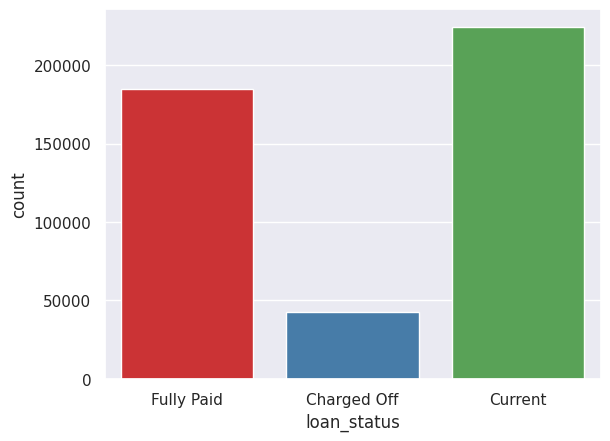

In [44]:
# Value_counts() to get the counts of each category and then select the top 3
top_3_loan_status = df_create['loan_status'].value_counts().nlargest(3).index

# Filter the DataFrame to include only the top 3 categories
df_top_3 = df_create[df_create['loan_status'].isin(top_3_loan_status)]

# Create the countplot for the top 3 categories
sns.countplot(x='loan_status', data=df_top_3, palette="Set1")
plt.show()

In [45]:
df_create.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

It can be seen that the `loan_status` variable has several values:
- `Current` means the payment is in date
- `Charged Off` means that the payment is in bad debt so it is written off
- `Late` means the payment was made late
- `In Grace Period` means within the grace period
- `Fully Paid` means payment in full
- `Default` means payment in default

From these definitions, each borrower can be categorized as a good borrower and a bad borrower.

The next stage can be said to be bad borrowers are borrowers who are late in payment until they default

In [46]:
bad_status = [
    'Charged Off'
    , 'Default'
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

df_create['bad_flag'] = np.where(df_create['loan_status'].isin(bad_status), 1, 0)

In [47]:
df_create['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

After separating between good borrowers and bad borrowers, it can be seen that there is imbalanced data because the good borrower data is 89% while the bad borrower is only 10%.

In [48]:
df_create.drop('loan_status', axis=1, inplace=True)


#DATA CLEANSING, DATA PREPROCESSING & FEATURE ENGINEERING
----
In this step, some features are cleaned/modified into a format that can be used for modeling.
##emp_length
`emp_length` is each borrower's data on the length of their work period.

This step is to modify `emp_length`. Example: 3 years becomes 3


In [49]:
df_create['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [50]:
df_create['emp_length_int'] = df_create['emp_length'].str.replace('\+ years', '')
df_create['emp_length_int'] = df_create['emp_length_int'].str.replace('< 1 year', str(0))
df_create['emp_length_int'] = df_create['emp_length_int'].str.replace(' years', '')
df_create['emp_length_int'] = df_create['emp_length_int'].str.replace(' year', '')

In [51]:
df_create['emp_length_int'] = df_create['emp_length_int'].astype(float)

In [52]:
df_create['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [53]:
df_create.drop('emp_length', axis=1, inplace=True)

## term
Modify term,`term` here indicates the tenor of the loan

The `term` column will also be simplified from 36 months to just the number 36

In [54]:
df_create['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [55]:
df_create['term_int'] = df_create['term'].str.replace(' months', '')
df_create['term_int'] = df_create['term_int'].astype(float)

In [56]:
df_create.drop('term', axis=1, inplace=True)

## earliest_cr_line

The `earliest_cr_line` column is the date when the credit account was created.

To simplify the next step, the `earliest_cr_line` column will be modified from the month-year format to a calculation of how much time has passed since that time.

Generally, reference date = today is used. However, since this dataset is a 2007-2014 dataset, it would be more relevant to use a reference date around 2017. In this example, 2017-12-01 is used as the reference date.

In [57]:
df_create['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [58]:
df_create['earliest_cr_line_date'] = pd.to_datetime(df_create['earliest_cr_line'], format='%b-%y')
df_create['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [59]:
df_create['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_create['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df_create['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [60]:
df_create['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

**min      -612.000000**

There is a strange value, which is negative.

In [61]:
df_create[df_create['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


Turns out that the negative value came because the Python function misinterpreted the year 62 to be the year 2062, when it should have been the year 1962.

To solve this I only changed the negative value to the maximum value of the feature. Since I know that negative values mean old data (1900s), it makes sense to change those values to the largest value.

In [62]:
df_create.loc[df_create['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df_create['mths_since_earliest_cr_line'].max()

In [ ]:
##df_create[df_create['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

In [63]:
df_create['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [64]:
df_create.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

## issue_d

The `issue_d` column contains information on the month in which the loan was funded.

The preprocessing concept is similar to the one performed on the `earliest_cr_line` variable.


In [65]:
df_create['issue_d_date'] = pd.to_datetime(df_create['issue_d'], format='%b-%y')
df_create['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_create['issue_d_date']) / np.timedelta64(1, 'M')))

In [66]:
df_create.mths_since_issue_d.describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [67]:
df_create.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

## last_pymnt_d

`last_pymnt_d` is the last payment information received.


In [68]:
df_create['last_pymnt_d_date'] = pd.to_datetime(df_create['last_pymnt_d'], format='%b-%y')
df_create['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_create['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [69]:
df_create['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [70]:
df_create.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

## next_pymnt_d

next_pymnt_d is an information column about the next payment.

In [71]:
df_create['next_pymnt_d_date'] = pd.to_datetime(df_create['next_pymnt_d'], format='%b-%y')
df_create['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_create['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [72]:
df_create['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [73]:
df_create.drop(['next_pymnt_d_date', 'next_pymnt_d'], axis=1, inplace=True)

## last_credit_pull_d

`last_credit_pull_d` is a column containing the latest credit check of the borrower.

In [74]:
df_create['last_credit_pull_d_date'] = pd.to_datetime(df_create['last_credit_pull_d'], format='%b-%y')
df_create['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_create['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [75]:
df_create['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [76]:
df_create.drop(['last_credit_pull_d_date', 'last_credit_pull_d'], axis=1, inplace=True)

In [77]:
df_create.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,10.65,162.87,B,NaN,RENT,24000.0,Verified,n,credit_card,Computer,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,10.0,36.0,395.0,72.0,35.0,NaN,23.0
1,2500,2500,2500.0,15.27,59.83,C,Ryder,RENT,30000.0,Source Verified,n,car,bike,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1,0.0,60.0,224.0,72.0,56.0,NaN,51.0
2,2400,2400,2400.0,15.96,84.33,C,NaN,RENT,12252.0,Not Verified,n,small_business,real estate business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,10.0,36.0,193.0,72.0,42.0,NaN,23.0
3,10000,10000,10000.0,13.49,339.31,C,AIR RESOURCES BOARD,RENT,49200.0,Source Verified,n,other,personel,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,10.0,36.0,262.0,72.0,35.0,NaN,35.0
4,3000,3000,3000.0,12.69,67.79,B,University Medical Group,RENT,80000.0,Source Verified,n,other,Personal,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,1.0,60.0,263.0,72.0,23.0,22.0,23.0


# EXPLORATORY DATA ANALYSIS

## Correlation Check

In [78]:
len(df_create.select_dtypes(include='number').columns)

41

In [79]:
num = df_create.select_dtypes(include='number').columns
cat = df_create.select_dtypes(include='object').columns

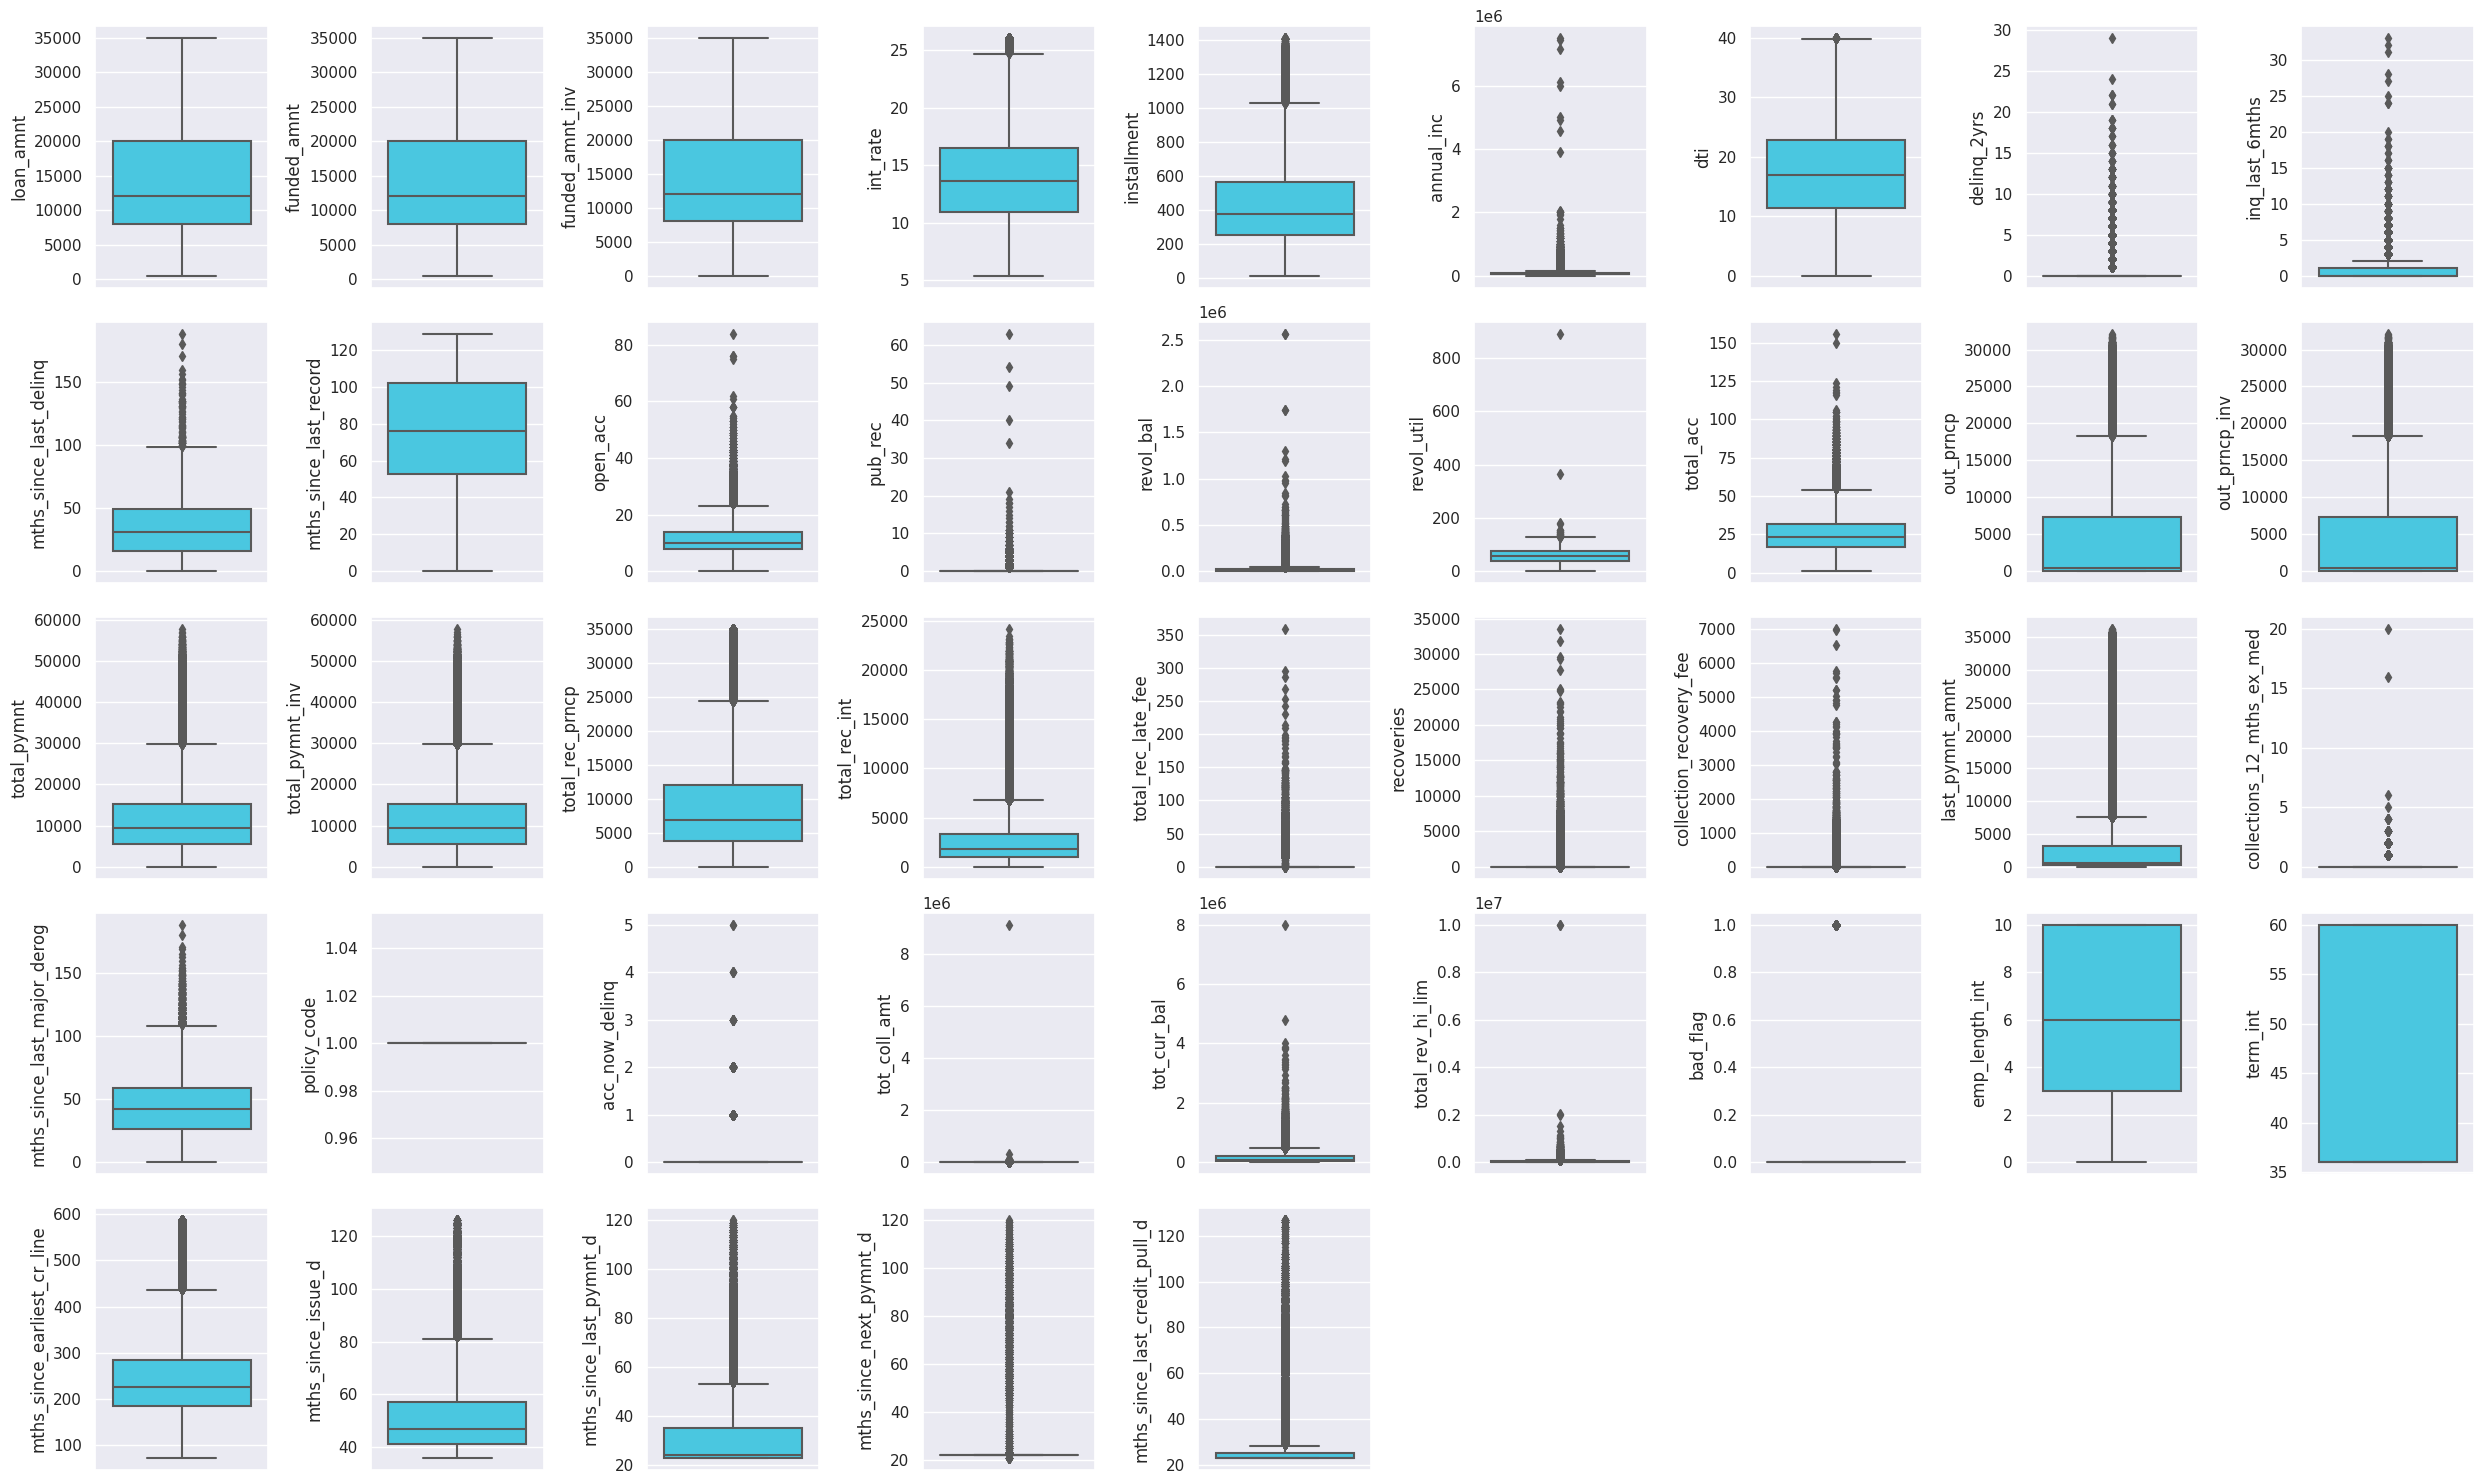

In [80]:
plt.figure(figsize=(25, 15))
n = 5
for i in range(0, len(num)):
    plt.subplot(n, math.ceil(len(num)/n), i+1)
    sns.boxplot(y=df_create[num[i]], color='#31D8F9', orient='v')
    plt.tight_layout()


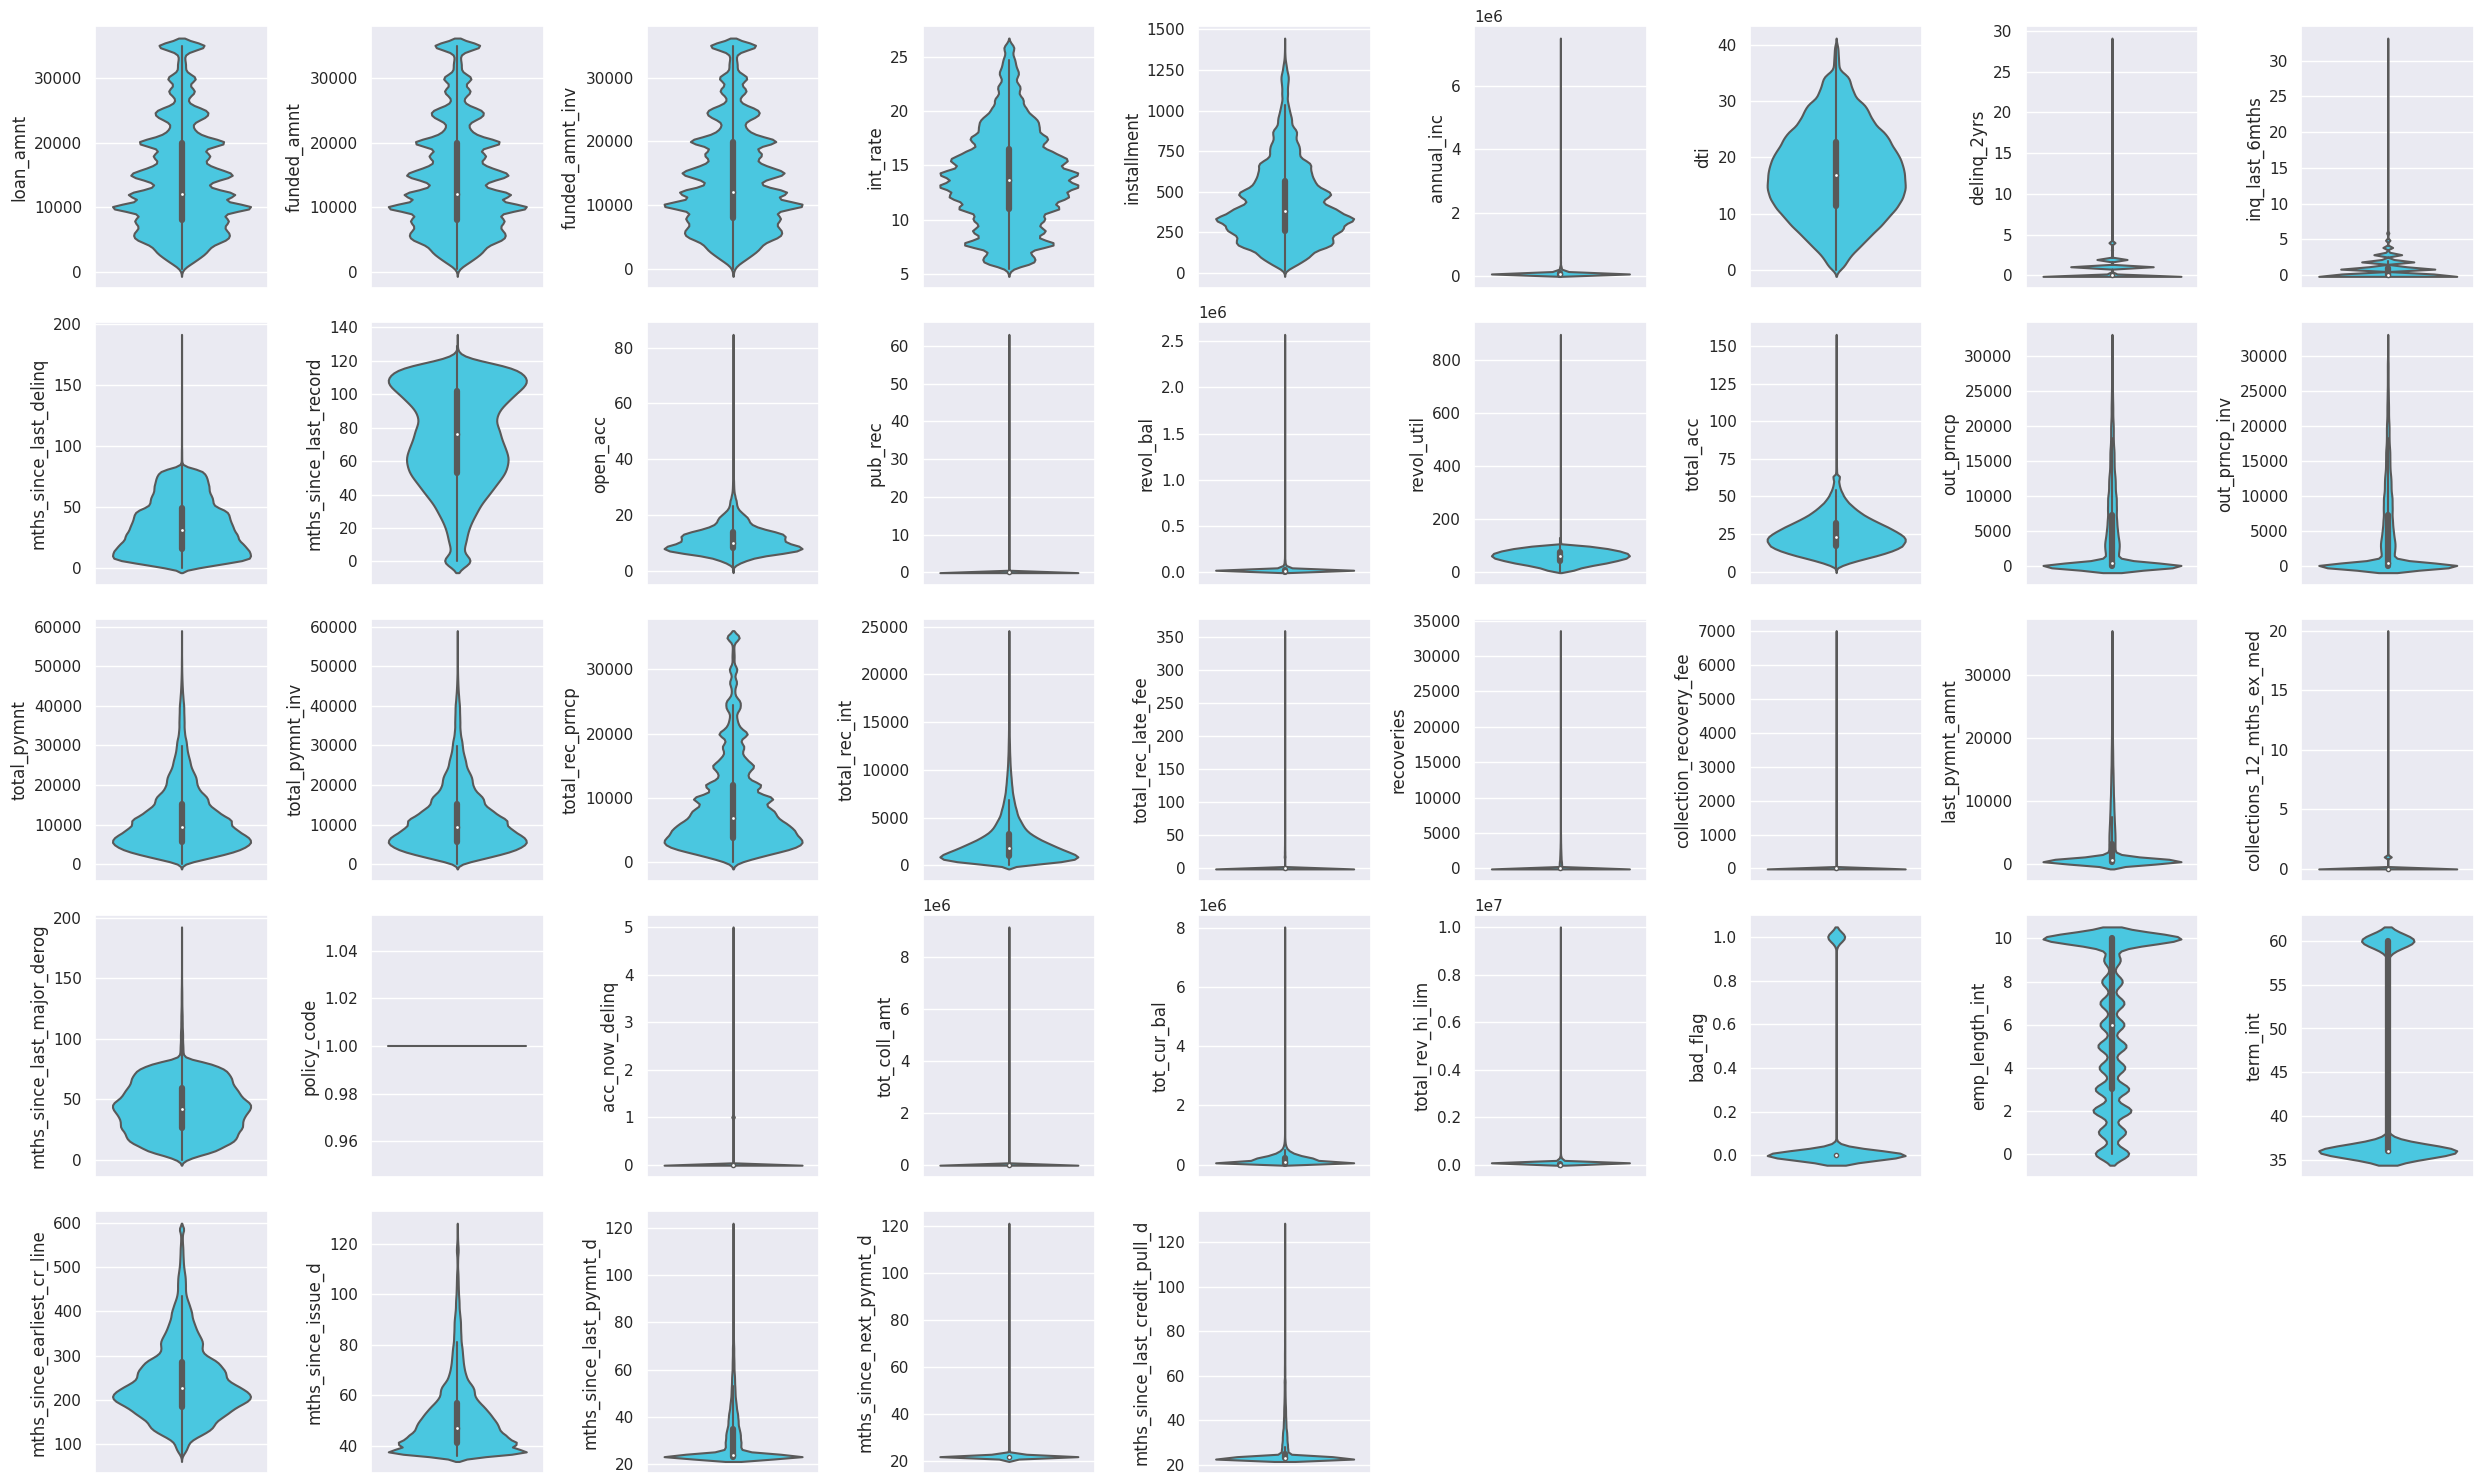

In [81]:
plt.figure(figsize=(25, 15))
n = 5
for i in range(0, len(num)):
    plt.subplot(n, math.ceil(len(num)/n), i+1)
    sns.violinplot(y=df_create[num[i]], color='#31D8F9',orient='v')
    plt.tight_layout()

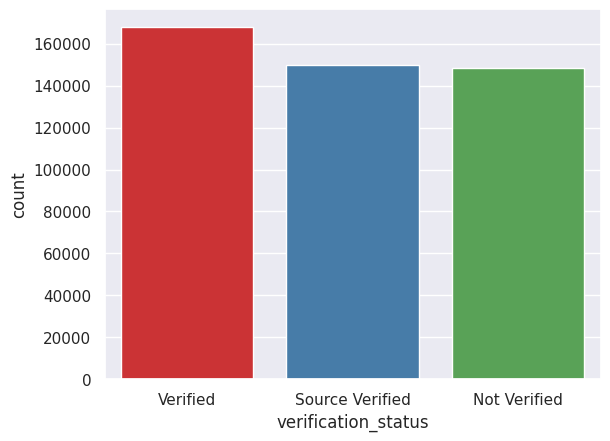

In [85]:
sns.countplot(x ='verification_status', data = df_create, palette = "Set1")
plt.show()

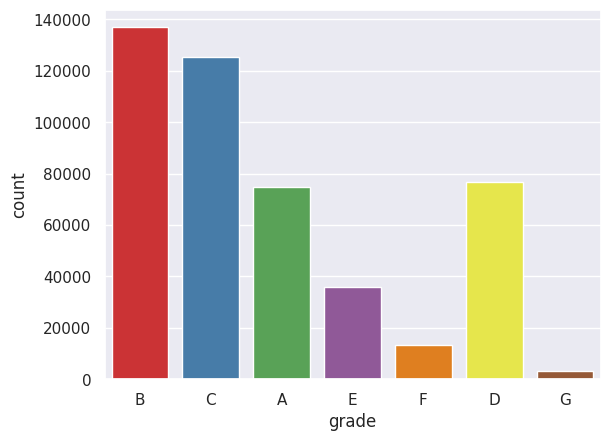

In [87]:
sns.countplot(x ='grade', data = df_create, palette = "Set1")
plt.show()

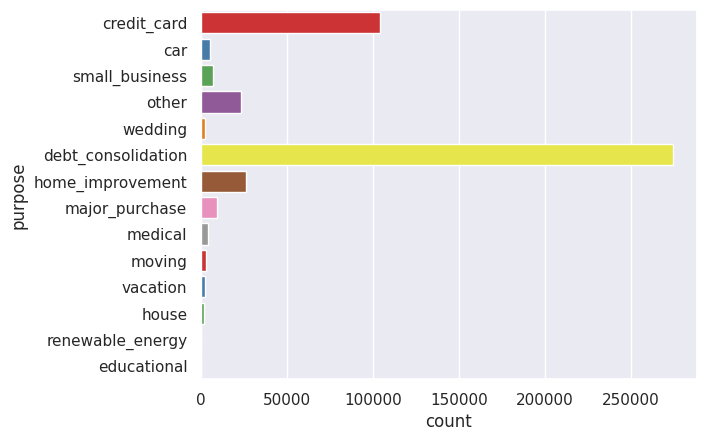

In [89]:
sns.countplot(y ='purpose', data = df_create, palette = "Set1")
plt.show()

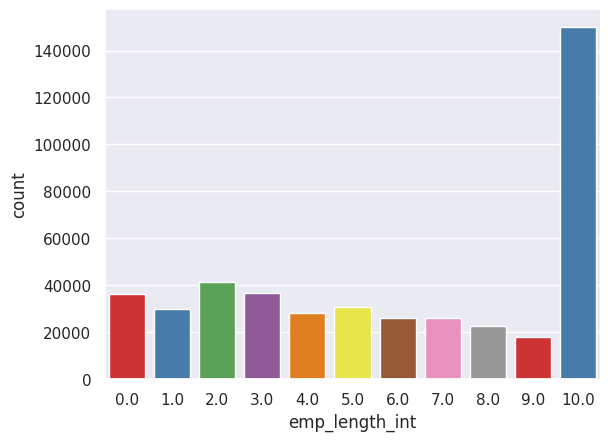

In [91]:
sns.countplot(x ='emp_length_int', data = df_create, palette = "Set1")
plt.show()

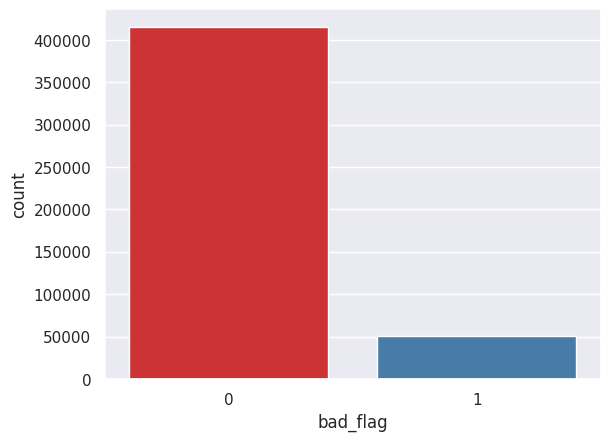

In [90]:
sns.countplot(x ='bad_flag', data = df_create, palette = "Set1")
plt.show()

<Axes: >

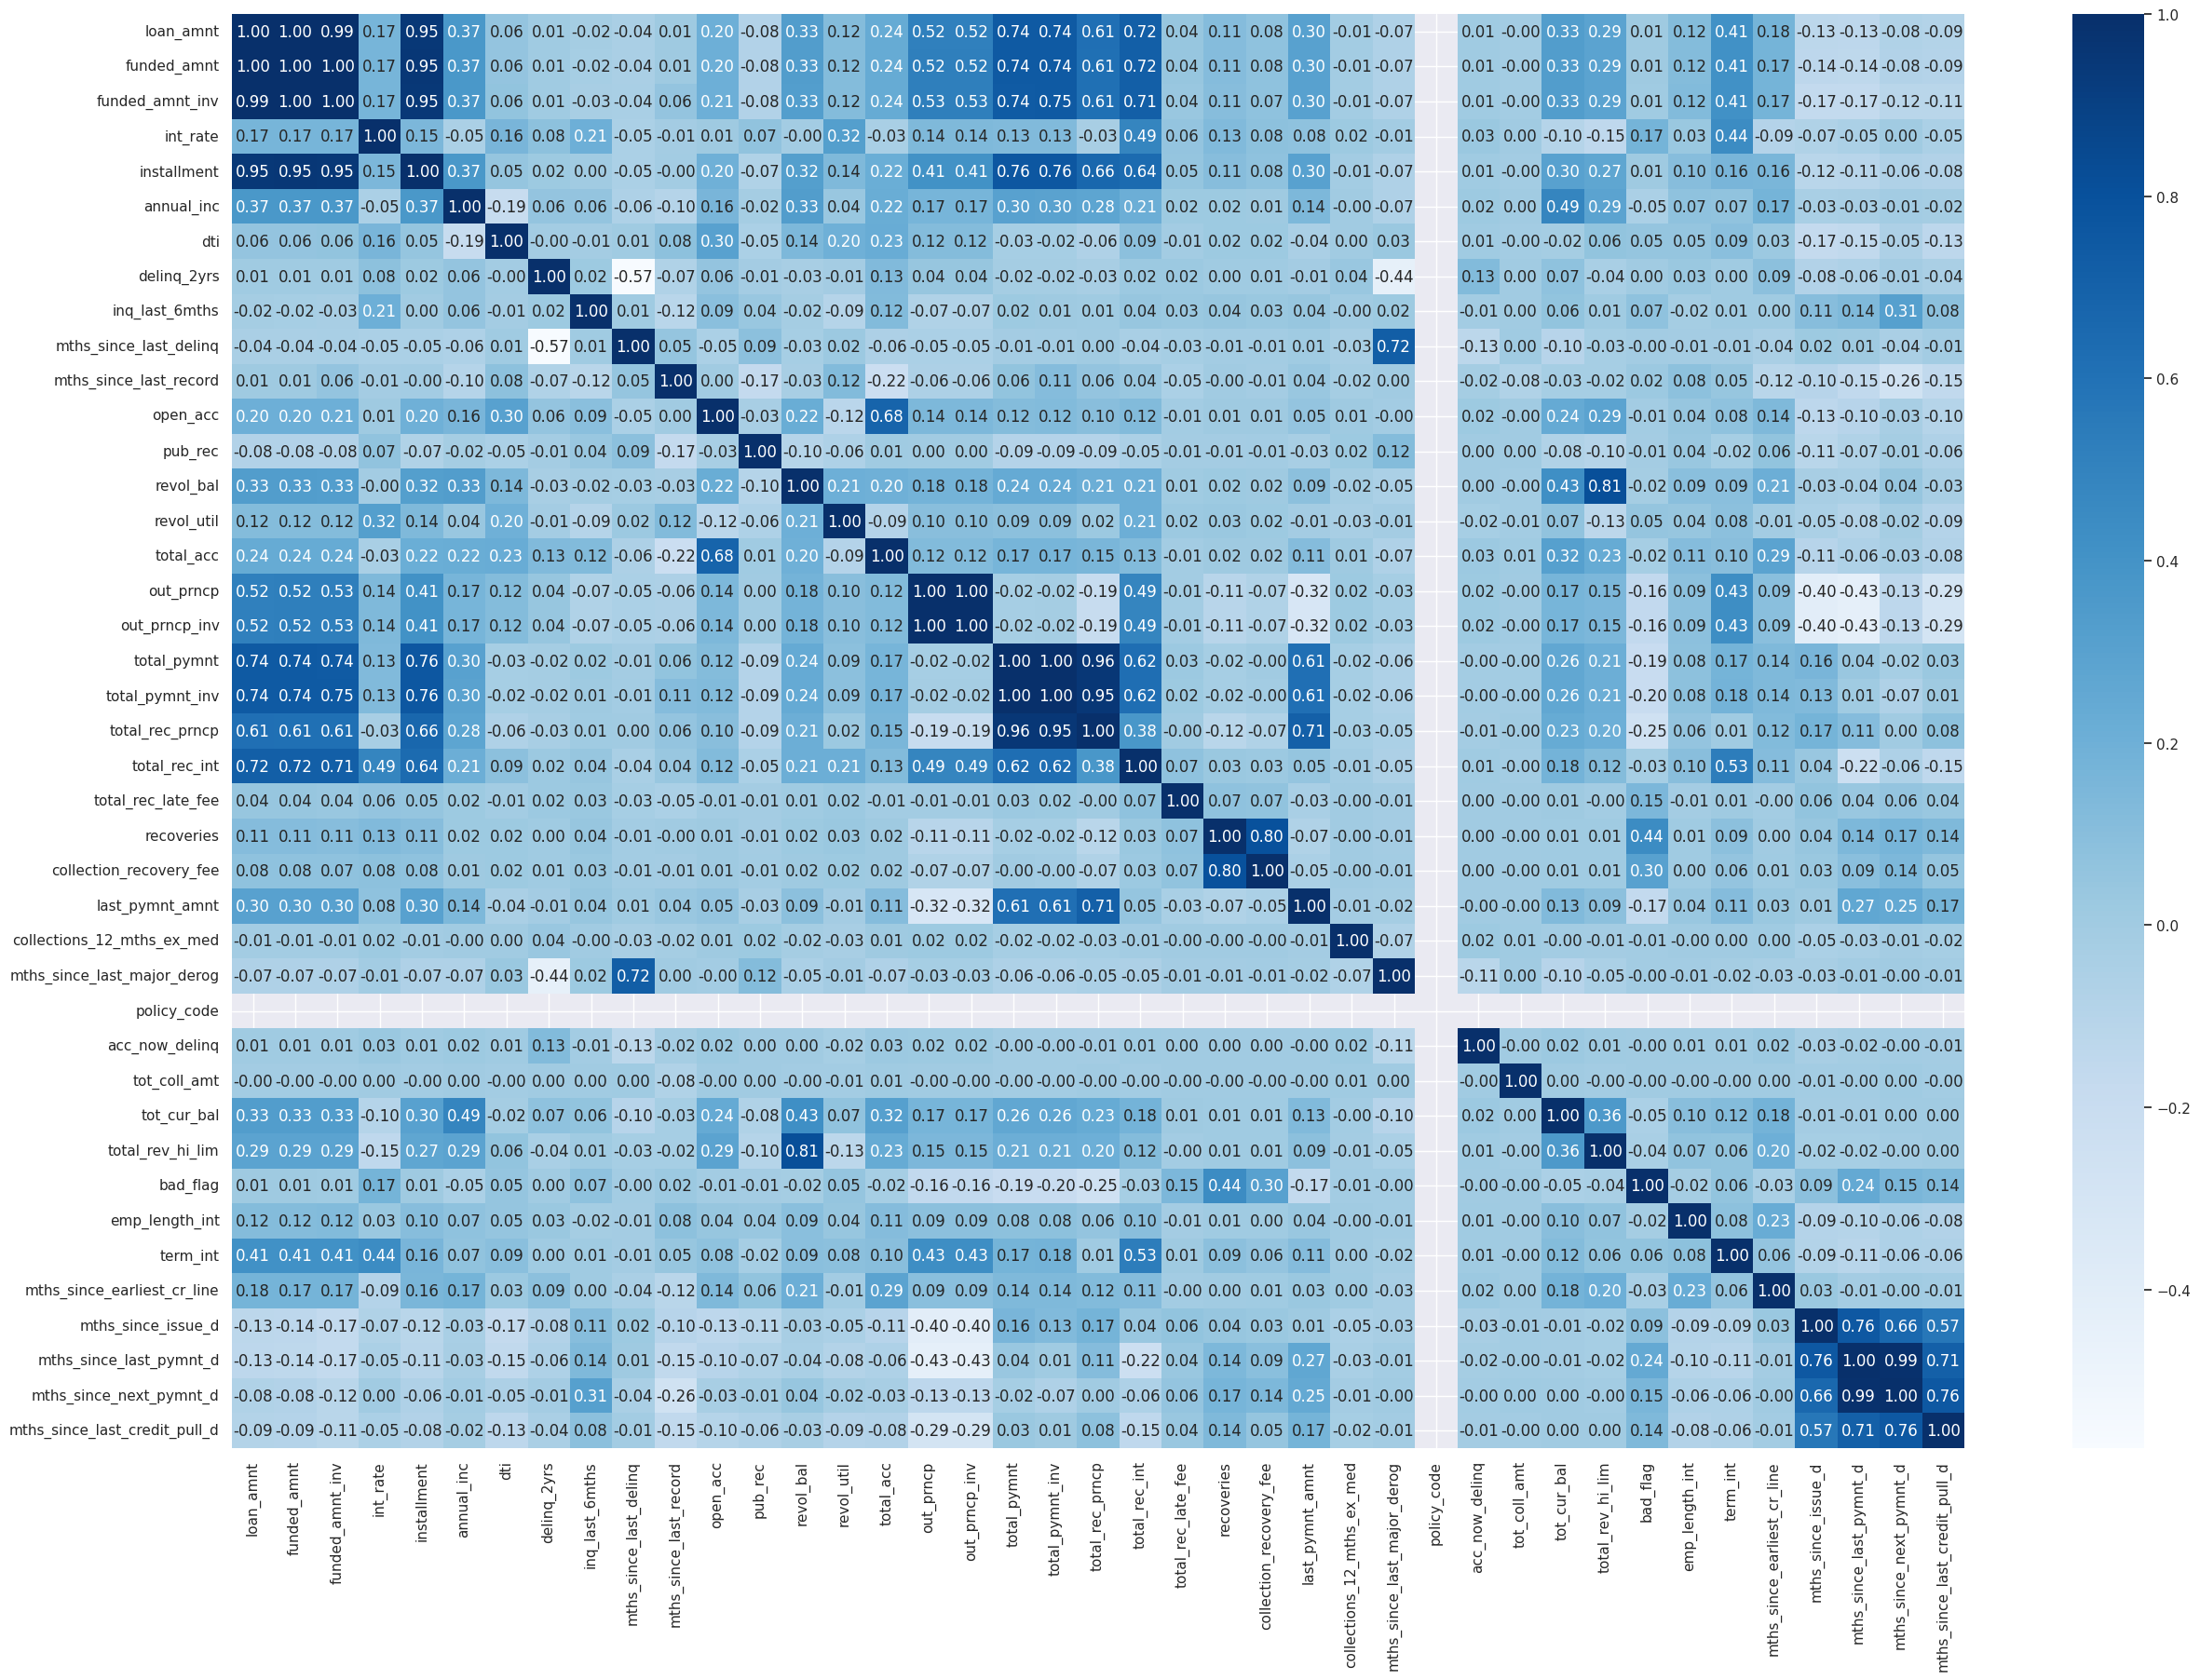

In [94]:
plt.figure(figsize=(30,20))
sns.heatmap(df_create.corr(), cmap='Blues', annot=True, fmt='.2f')

In this case, if there are pairs of features that have a high correlation, one of them will be taken. The correlation value used as a benchmark for high correlation is uncertain, mostly 0.7 is used.

In [95]:
corr_matrix = df_create.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [96]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

# Check Categorical Features

In [97]:
df_create.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [99]:
# remove features that have a very high cardinality and features that have only one unique value.
df_create.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [100]:
df_create.select_dtypes(include='object').nunique()

grade                   7
home_ownership          6
verification_status     3
pymnt_plan              2
purpose                14
addr_state             50
initial_list_status     2
dtype: int64

In [101]:
df_create.select_dtypes(exclude='object').nunique()

loan_amnt                          1352
funded_amnt                        1354
funded_amnt_inv                    9854
int_rate                            506
installment                       55622
annual_inc                        31901
dti                                3997
delinq_2yrs                          24
inq_last_6mths                       28
mths_since_last_delinq              145
mths_since_last_record              123
open_acc                             62
pub_rec                              26
revol_bal                         58142
revol_util                         1269
total_acc                           112
out_prncp                        135665
out_prncp_inv                    141189
total_pymnt                      351609
total_pymnt_inv                  347659
total_rec_prncp                  172713
total_rec_int                    270249
total_rec_late_fee                 5808
recoveries                        22773
collection_recovery_fee           20275


In [103]:
df_create.drop(['policy_code'], axis=1, inplace=True)

In [104]:
for col in df_create.select_dtypes(include='object').columns.tolist():
    print(df_create[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

In [105]:
# remove pymnt_plan because just has 1 recomendation data
df_create.drop('pymnt_plan', axis=1, inplace=True)

# MISSING VALUES
## Missing Value Checking

In [106]:
print('Missing values status:', df_create.isnull().values.any())
nvc = pd.DataFrame(df_create.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_create.shape[0])*100
nvc["Data Type"] = [df_create[col].dtype for col in df_create.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc["NULL Values"] = df_create[nvc.index].isnull().sum()
nvc

Missing values status: True


,Total Null Values,Percentage,Data Type,NULL Values
mths_since_last_record,403647,86.566585,float64,403647
mths_since_last_major_derog,367311,78.773926,float64,367311
mths_since_last_delinq,250351,53.690554,float64,250351
mths_since_next_pymnt_d,227214,48.728567,float64,227214
tot_coll_amt,70276,15.071469,float64,70276
tot_cur_bal,70276,15.071469,float64,70276
total_rev_hi_lim,70276,15.071469,float64,70276
emp_length_int,21008,4.505399,int64,21008
mths_since_last_pymnt_d,376,0.080637,float64,376
revol_util,340,0.072917,float64,340


In [108]:
# columns with missing values above 75% are removed
# then the missing values in some columns can be filled with '0'

df_create.drop('mths_since_last_record', axis=1, inplace=True)
df_create.drop('mths_since_last_major_derog', axis=1, inplace=True)

## Filling The Missing Values

In [109]:
df_create['annual_inc'].fillna(df_create['annual_inc'].mean(), inplace=True)
df_create['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df_create['acc_now_delinq'].fillna(0, inplace=True)
df_create['total_acc'].fillna(0, inplace=True)
df_create['pub_rec'].fillna(0, inplace=True)
df_create['open_acc'].fillna(0, inplace=True)
df_create['inq_last_6mths'].fillna(0, inplace=True)
df_create['delinq_2yrs'].fillna(0, inplace=True)
df_create['collections_12_mths_ex_med'].fillna(0, inplace=True)
df_create['revol_util'].fillna(0, inplace=True)
df_create['emp_length_int'].fillna(0, inplace=True)
df_create['tot_cur_bal'].fillna(0, inplace=True)
df_create['tot_coll_amt'].fillna(0, inplace=True)
df_create['mths_since_last_delinq'].fillna(-1, inplace=True)

In [110]:
df_create.isna().sum()

loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
int_rate                              0
installment                           0
grade                                 0
home_ownership                        0
annual_inc                            0
verification_status                   0
purpose                               0
addr_state                            0
dti                                   0
delinq_2yrs                           0
inq_last_6mths                        0
mths_since_last_delinq                0
open_acc                              0
pub_rec                               0
revol_bal                             0
revol_util                            0
total_acc                             0
initial_list_status                   0
out_prncp                             0
out_prncp_inv                         0
total_pymnt                           0
total_pymnt_inv                       0


In [111]:
df_create['mths_since_last_pymnt_d'].fillna(df_create['mths_since_last_pymnt_d'].median(), inplace=True)
df_create['mths_since_next_pymnt_d'].fillna(df_create['mths_since_next_pymnt_d'].median(), inplace=True)
df_create['mths_since_last_credit_pull_d'].fillna(df_create['mths_since_last_credit_pull_d'].median(), inplace=True)

In [115]:
df_create['total_rev_hi_lim'].fillna(df_create['total_rev_hi_lim'].mean(), inplace=True)

In [116]:
df_create.isna().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
int_rate                         0
installment                      0
grade                            0
home_ownership                   0
annual_inc                       0
verification_status              0
purpose                          0
addr_state                       0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
mths_since_last_delinq           0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       0
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries          

In [119]:
df_create.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
362959,8000,8000,8000.0,14.49,275.33,C,MORTGAGE,49596.0,Verified,home_improvement,AL,28.33,0.0,1.0,-1.0,7.0,1.0,4822,51.3,22.0,w,4430.4,4430.4,4955.94,4955.94,3569.6,1386.34,0.0,0.0,0.0,275.33,0.0,0.0,0.0,21706.0,9400.0,0,0.0,36.0,174.0,42.0,23.0,23.0,23.0


# One Hot Encoding

In [120]:
categorical_cols = [col for col in df_create.select_dtypes(include='object').columns.tolist()]

In [121]:
onehot = pd.get_dummies(df_create[categorical_cols], drop_first=True)

In [122]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Standardization

In [123]:
numerical_cols = [col for col in df_create.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [124]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df_create[numerical_cols]), columns=numerical_cols)
std.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,-1.124392,-1.122963,-1.114455,-0.729587,-1.105575,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.693896,-0.687137,-0.683064,-0.549800,-0.695548,-0.123464,-0.154549,-0.104824,-0.531492,-0.083608,-0.058307,-0.012089,-0.792648,1.059842e-16,1.138605,-0.616225,1.764941,1.446626,0.289817,-0.086587,-0.419801
1,-1.426088,-1.425101,-1.412732,0.330634,-1.528763,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.693896,-1.274191,-1.267385,-1.195952,-0.867019,-0.123464,0.057470,-0.091840,-0.540846,-0.083608,-0.058307,-0.012089,-0.792648,1.059842e-16,-1.523744,1.622784,-0.212426,1.446626,1.929623,-0.086587,2.485953
2,-1.438156,-1.437186,-1.424784,0.488979,-1.428140,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.693896,-1.032837,-1.025695,-0.919555,-0.799187,-0.123464,-0.154549,-0.104824,-0.445387,-0.083608,-0.058307,-0.012089,-0.792648,1.059842e-16,1.138605,-0.616225,-0.570896,1.446626,0.836419,-0.086587,-0.419801
3,-0.521001,-0.518687,-0.508860,-0.077850,-0.380931,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,-0.693896,0.082948,0.091640,0.161268,-0.152728,3.099264,-0.154549,-0.104824,-0.498032,-0.083608,-0.058307,-0.012089,-0.792648,1.059842e-16,1.138605,-0.616225,0.226989,1.446626,0.289817,-0.086587,0.825522
4,-1.365749,-1.364673,-1.352474,-0.261438,-1.496071,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.573185,-1.003980,-0.996798,-0.943290,-0.635962,-0.123464,-0.154549,-0.104824,-0.550184,-0.083608,-0.058307,-0.012089,-0.792648,1.059842e-16,-1.257509,1.622784,0.238553,1.446626,-0.647215,-0.086587,-0.419801


# Transform Dataframe

In [125]:
data_model = pd.concat([onehot, std, df_create[['bad_flag']]], axis=1)


# MODELING
## Train-Test Split

In [126]:
from sklearn.model_selection import train_test_split
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((373028, 113), (93257, 113))

# Train the data

In [128]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.svm import SVC # Support Vector Machine/Classifier
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting
from xgboost import XGBClassifier #xgboost
from sklearn.ensemble import AdaBoostClassifier #Adaboost

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve #roc score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# reimport for backup
import re
import warnings
warnings.filterwarnings('ignore')

# Function for Model Evaluation

In [129]:
train_classifier_list = []
train_modelname_list = []
train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_score_list= []
train_roc_auc_score_list = []
train_cross_val_f1_list = []
train_cross_val_rocauc_list = []

test_classifier_list = []
test_modelname_list = []
test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_score_list= []
test_roc_auc_score_list = []
test_cross_val_f1_list = []
test_cross_val_rocauc_list = []
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
X_s, y_s = shuffle(X, y, random_state=42)
kf = KFold(10, shuffle=True, random_state=0)

# Function Evaluation for Recap Classification

In [130]:
def eval_classification(model, model_name, save=True):
    # predict train
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)

    # predict test
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)

    # cross validation
    cv_score_f1 = cross_validate(model, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    cv_score_rocauc = cross_validate(model, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)


    accuracy_train = round(accuracy_score(y_train, y_train_pred), 3)
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    f1_s_train = round(f1_score(y_train, y_train_pred), 3)
    csf_score_train = round(cv_score_f1['train_score'].mean(), 3)
    rocauc_score_train = round(roc_auc_score(y_train, y_train_pred_prob[:, 1]), 3)
    csr_score_train = round(cv_score_rocauc['train_score'].mean(), 3)

    accuracy_test = round(accuracy_score(y_test, y_test_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
    f1_s_test = round(f1_score(y_test, y_test_pred), 3)
    csf_score_test = round(cv_score_f1['test_score'].mean(), 3)
    rocauc_score_test = round(roc_auc_score(y_test, y_test_pred_prob[:, 1]), 3)
    csr_score_test = round(cv_score_rocauc['test_score'].mean(), 3)

    if save :

        # save report detail train
        train_classifier_list.append(model)
        train_modelname_list.append(model_name)
        train_accuracy_list.append(accuracy_train)
        train_precision_list.append(precision_train)
        train_recall_list.append(recall_train)
        train_f1_score_list.append(f1_s_train)
        train_cross_val_f1_list.append(csf_score_train)
        train_roc_auc_score_list.append(rocauc_score_train)
        train_cross_val_rocauc_list.append(csr_score_train)

        # save report detail test
        test_classifier_list.append(model)
        test_modelname_list.append(model_name)
        test_accuracy_list.append(accuracy_test)
        test_precision_list.append(precision_test)
        test_recall_list.append(recall_test)
        test_f1_score_list.append(f1_s_test)
        test_cross_val_f1_list.append(csf_score_test)
        test_roc_auc_score_list.append(rocauc_score_test)
        test_cross_val_rocauc_list.append(csr_score_test)


    metrics_summary = pd.DataFrame({
        'Evaluation Metrics' : ["Accuracy", "Precision", "Recall", "F1 Score", "F1 Score (crossval)", "ROC AUC", "ROC AUC (crossval)"],
        'Train' : [accuracy_train, precision_train, recall_train, f1_s_train, csf_score_train, rocauc_score_train, csr_score_train],
        'Test' : [accuracy_test, precision_test, recall_test, f1_s_test, csf_score_test, rocauc_score_test, csr_score_test]})

    metrics_summary["Diff Range"] = metrics_summary['Train'] - metrics_summary['Test']
    return metrics_summary.reset_index(drop = True).style.background_gradient(cmap='Purples')

# define function to see the best tuning hyperparameter
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# Function Evaluation for Training

In [131]:
def model_eval_train(classifier, model_name, X_train, y_train):
    # predict data train
    y_train_pred = classifier.predict(X_train)
    y_train_pred_prob = classifier.predict_proba(X_train)

    # print classification report
    print('Classification Report Training Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_train, y_train_pred), 3)
    precision = round(precision_score(y_train, y_train_pred), 3)
    recall = round(recall_score(y_train, y_train_pred), 3)
    f1_s = round(f1_score(y_train, y_train_pred), 3)
    rocauc_score = round(roc_auc_score(y_train, y_train_pred_prob[:, 1]), 3)

    # c_val_score = round(cross_val_score(classifier, X_s, y_s, cv=kf, scoring='roc_auc').mean()  , 3)
    cv_score_f1 = cross_validate(classifier, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    csf_score = round(cv_score_f1['train_score'].mean(), 3)

    cv_score_rocauc = cross_validate(classifier, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    csr_score = round(cv_score_rocauc['train_score'].mean(), 3)

    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F1 Score = {f1_s}')
    print(f'Cross Val F1 (k=5) = {csf_score}')
    print(f'ROC AUC = {rocauc_score}')
    print(f'Cross Val ROC AUC (k=5) = {csr_score}\n')

    print(classification_report(y_train, y_train_pred))

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('good', 'bad'), ('good', 'bad'))
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

    print("==== Actual Data (Train) =====")
    print("Total =", len(y_train))
    print("good =", len(y_train[y_train == 0]))
    print("bad =", len(y_train[y_train == 1]))
    print("==== Predicted Data (Train) =====")
    print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])

    c_matrix = confusion_matrix(y_train, y_train_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='Greens')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Training Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('Actual Label', fontsize=13)
    plt.xlabel('\nPredicted Label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_train, y_train_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Is Data Good or Bad')
    plt.legend(loc="lower right")
    plt.show()

# Function Evaluation for Test

In [132]:
def model_eval_test(classifier, model_name, X_test, y_test):

     # predict data test
    y_test_pred = classifier.predict(X_test)
    y_test_pred_prob = classifier.predict_proba(X_test)


    # print classification report
    print('Classification Report Testing Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_test, y_test_pred), 3)
    precision = round(precision_score(y_test, y_test_pred), 3)
    recall = round(recall_score(y_test, y_test_pred), 3)
    f1_s = round(f1_score(y_test, y_test_pred), 3)
    rocauc_score = round(roc_auc_score(y_test, y_test_pred_prob[:, 1]), 3)

    # c_val_score = round(cross_val_score(classifier, X_s, y_s , cv=kf , scoring='roc_auc').mean()  , 3)
    cv_score_f1 = cross_validate(classifier, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    csf_score = round(cv_score_f1['test_score'].mean(), 3)

    cv_score_rocauc = cross_validate(classifier, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    csr_score = round(cv_score_rocauc['test_score'].mean(), 3)

    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F1 Score = {f1_s}')
    print(f'Cross Val F1 (k=5) = {csf_score}')
    print(f'ROC AUC = {rocauc_score}')
    print(f'Cross Val ROC AUC (k=5) = {csr_score}\n')

    print(classification_report(y_test, y_test_pred))

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('good', 'bad'), ('good', 'bad'))
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

    print("==== Actual Data (Test) =====")
    print("Total =", len(y_test))
    print("good =", len(y_test[y_test == 0]))
    print("bad =", len(y_test[y_test == 1]))
    print("==== Predicted Data (Test) =====")
    print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])

    c_matrix = confusion_matrix(y_test, y_test_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='Oranges')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Testing Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('Actual Label', fontsize=13)
    plt.xlabel('\nPredicted Label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Is Data Good or Bad')
    plt.legend(loc="lower right")
    plt.show()

In [133]:
# train the model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
print(dt_model)
eval_classification(dt_model, "Decision Tree")

DecisionTreeClassifier(random_state=42)


,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,1.000000,0.991000,0.009000
1,Precision,1.000000,0.959000,0.041000
2,Recall,1.000000,0.963000,0.037000
3,F1 Score,1.000000,0.961000,0.039000
4,F1 Score (crossval),1.000000,0.962000,0.038000
5,ROC AUC,1.000000,0.979000,0.021000
6,ROC AUC (crossval),1.000000,0.979000,0.021000


Classification Report Training Model (Decision Tree):

Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0
Cross Val F1 (k=5) = 1.0
ROC AUC = 1.0
Cross Val ROC AUC (k=5) = 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    332250
           1       1.00      1.00      1.00     40778

    accuracy                           1.00    373028
   macro avg       1.00      1.00      1.00    373028
weighted avg       1.00      1.00      1.00    373028

==== Actual Data (Train) =====
Total = 373028
good = 332250
bad = 40778
==== Predicted Data (Train) =====
TP = 40778, FP = 0, TN = 332250, FN = 0
Predictly Correct = 373028
Predictly Wrong = 0 



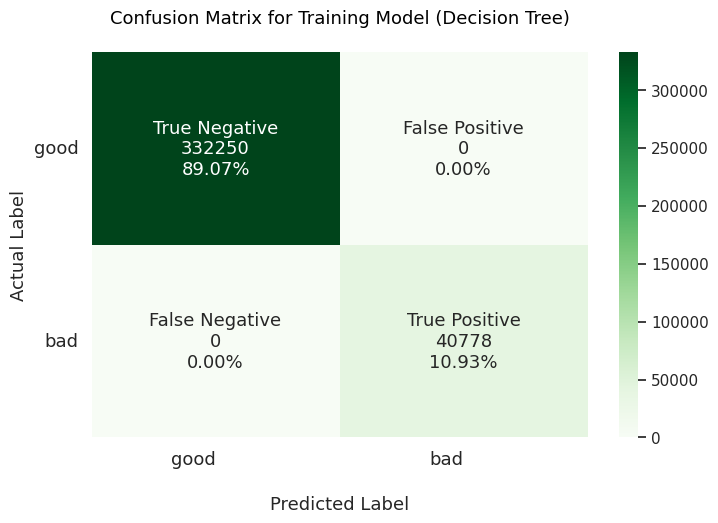

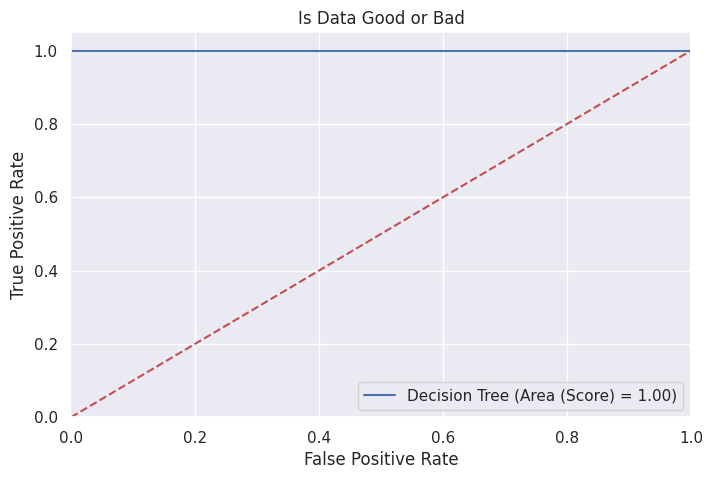

In [134]:
model_eval_train(dt_model, "Decision Tree", X_train, y_train)


Classification Report Testing Model (Decision Tree):

Accuracy = 0.991
Precision = 0.959
Recall = 0.963
F1 Score = 0.961
Cross Val F1 (k=5) = 0.962
ROC AUC = 0.979
Cross Val ROC AUC (k=5) = 0.979

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     83067
           1       0.96      0.96      0.96     10190

    accuracy                           0.99     93257
   macro avg       0.98      0.98      0.98     93257
weighted avg       0.99      0.99      0.99     93257

==== Actual Data (Test) =====
Total = 93257
good = 83067
bad = 10190
==== Predicted Data (Test) =====
TP = 9809, FP = 422, TN = 82645, FN = 381
Predictly Correct = 92454
Predictly Wrong = 803 



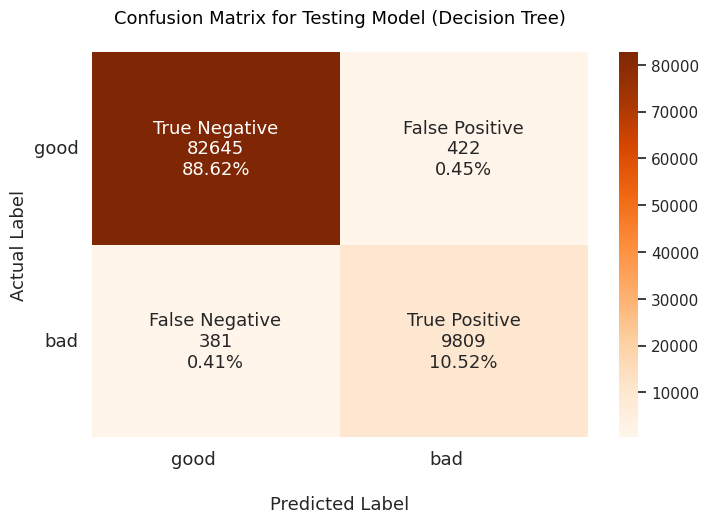

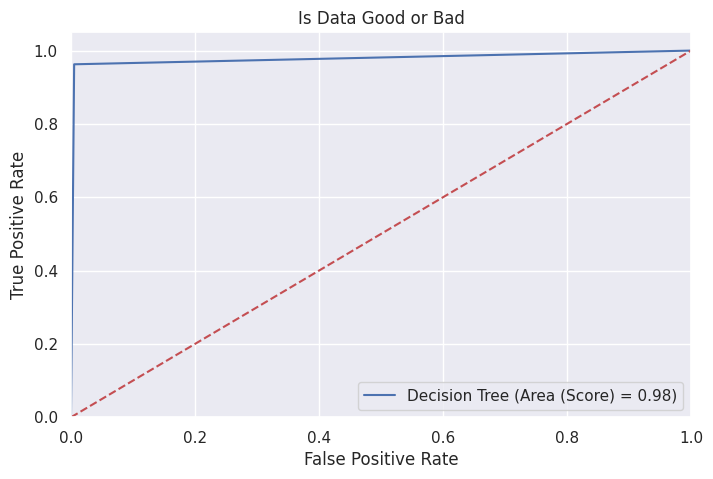

In [135]:
model_eval_test(dt_model, "Decision Tree", X_test, y_test)

In [136]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dt_train))
print("Testing Accuracy: {} %".format(acc_dt_test))

Training Accuracy: 100.0 %
Testing Accuracy: 99.14 %


In [137]:
# train the model Logistic Regression
log_model = LogisticRegression(solver='lbfgs', max_iter=len(X_train), random_state=42).fit(X_train, y_train)
print(log_model)
eval_classification(log_model, "Logistic Regression")

LogisticRegression(max_iter=373028, random_state=42)


,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,0.981000,0.981000,0.000000
1,Precision,0.992000,0.990000,0.002000
2,Recall,0.837000,0.834000,0.003000
3,F1 Score,0.908000,0.905000,0.003000
4,F1 Score (crossval),0.908000,0.908000,0.000000
5,ROC AUC,0.977000,0.977000,0.000000
6,ROC AUC (crossval),0.977000,0.977000,0.000000


Classification Report Training Model (Logistic Regression):

Accuracy = 0.981
Precision = 0.992
Recall = 0.837
F1 Score = 0.908
Cross Val F1 (k=5) = 0.908
ROC AUC = 0.977
Cross Val ROC AUC (k=5) = 0.977

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    332250
           1       0.99      0.84      0.91     40778

    accuracy                           0.98    373028
   macro avg       0.99      0.92      0.95    373028
weighted avg       0.98      0.98      0.98    373028

==== Actual Data (Train) =====
Total = 373028
good = 332250
bad = 40778
==== Predicted Data (Train) =====
TP = 34115, FP = 277, TN = 331973, FN = 6663
Predictly Correct = 366088
Predictly Wrong = 6940 



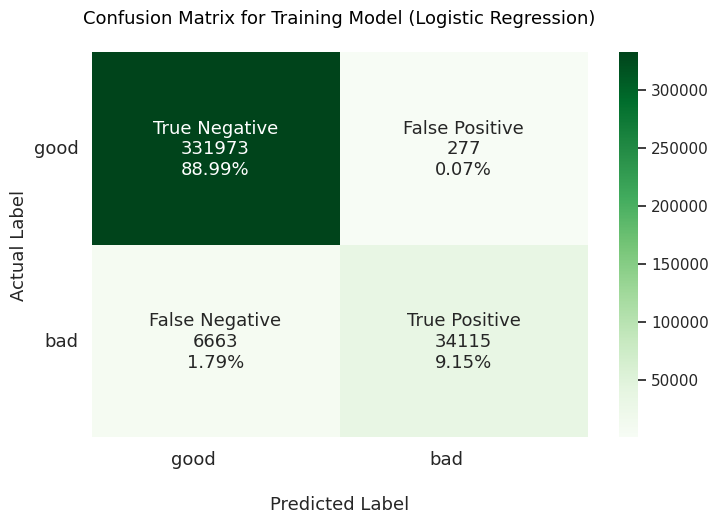

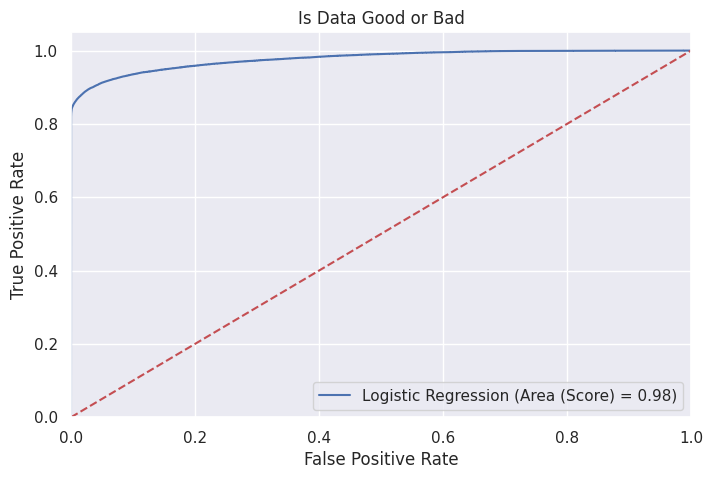

In [138]:
model_eval_train(log_model, "Logistic Regression", X_train, y_train)

Classification Report Testing Model (Logistic Regression):

Accuracy = 0.981
Precision = 0.99
Recall = 0.834
F1 Score = 0.905
Cross Val F1 (k=5) = 0.908
ROC AUC = 0.977
Cross Val ROC AUC (k=5) = 0.977

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83067
           1       0.99      0.83      0.91     10190

    accuracy                           0.98     93257
   macro avg       0.99      0.92      0.95     93257
weighted avg       0.98      0.98      0.98     93257

==== Actual Data (Test) =====
Total = 93257
good = 83067
bad = 10190
==== Predicted Data (Test) =====
TP = 8497, FP = 83, TN = 82984, FN = 1693
Predictly Correct = 91481
Predictly Wrong = 1776 



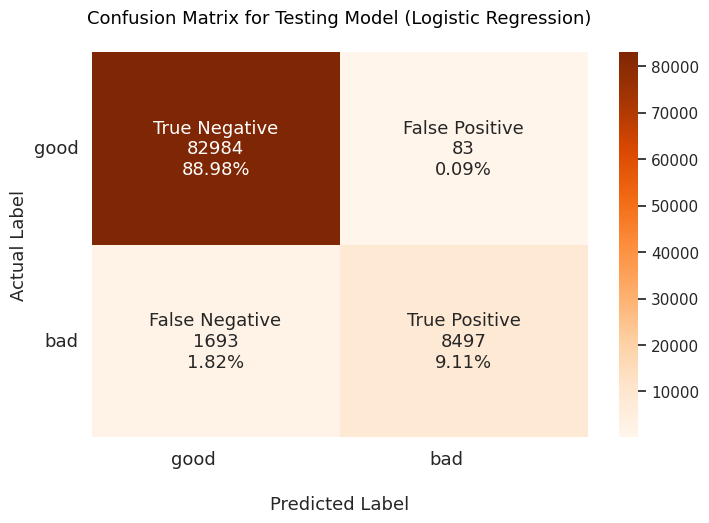

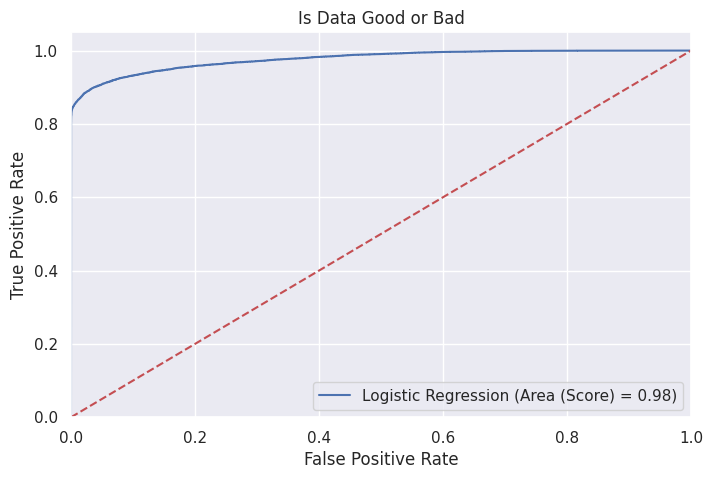

In [139]:
model_eval_test(log_model, "Logistic Regression", X_test, y_test)

In [140]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

Training Accuracy: 98.14 %
Test Accuracy: 98.1 %


In [141]:
results_eval = pd.DataFrame({
    "Models" : train_modelname_list,
    "Precision (Train)": train_precision_list,
    "Precision (Test)": test_precision_list,
    "Recall (Train)": train_recall_list,
    "Recall (Test)": test_recall_list,
    "F1 Score (Train)" : train_f1_score_list,
    "F1 Score (Test)" : test_f1_score_list
})

results_eval.drop_duplicates(inplace = True)

results_eval.sort_values(by=["F1 Score (Test)", "Precision (Test)", "Recall (Test)"], ascending=[False, False, False]).reset_index(drop = True).style.background_gradient(cmap="Purples")

,Models,Precision (Train),Precision (Test),Recall (Train),Recall (Test),F1 Score (Train),F1 Score (Test)
0,Decision Tree,1.000000,0.959000,1.000000,0.963000,1.000000,0.961000
1,Logistic Regression,0.992000,0.990000,0.837000,0.834000,0.908000,0.905000


# MODELING
## Train-Test Split

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [144]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values

df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features


,feature,importance
98,recoveries,2.760254e-01
99,collection_recovery_fee,1.907707e-01
95,total_rec_prncp,1.026500e-01
100,last_pymnt_amnt,1.009964e-01
110,mths_since_last_pymnt_d,8.348824e-02
92,out_prncp_inv,3.769987e-02
93,total_pymnt,3.679064e-02
91,out_prncp,3.477869e-02
94,total_pymnt_inv,3.188245e-02
80,installment,1.568832e-02


# Validation

In [145]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

## AUC

In [146]:
from sklearn.metrics import roc_curve, roc_auc_score

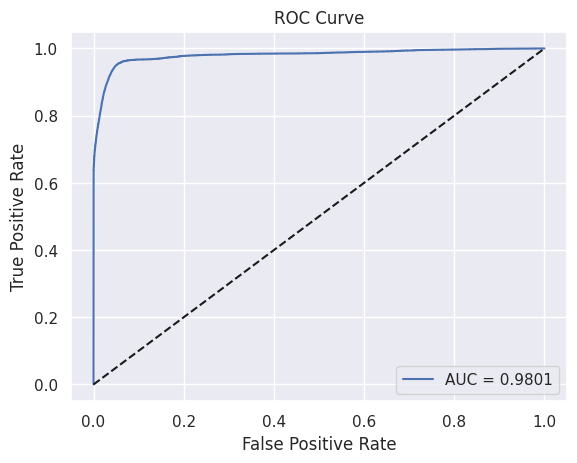

In [147]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# KS

In [148]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [149]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,342832,0,0.021602,1,0,1,0.000011,0.0,0.000012
1,270060,0,0.021816,2,0,2,0.000021,0.0,0.000024
2,338719,0,0.022031,3,0,3,0.000032,0.0,0.000036
3,63956,0,0.022700,4,0,4,0.000043,0.0,0.000048
4,257453,0,0.023002,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.9002')

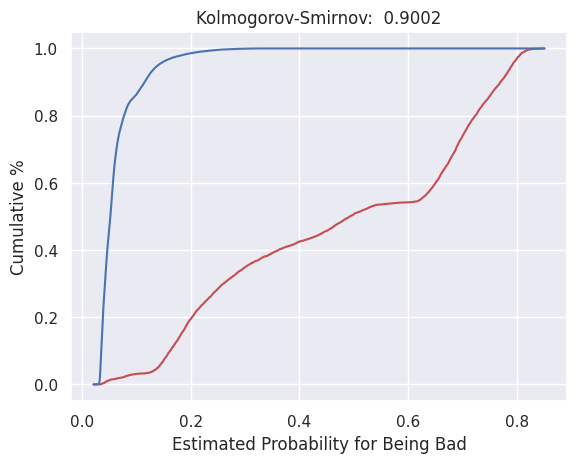

In [150]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

## Model yang dibangun menghasilkan performa AUC = 0.9801 dan KS = 0.9002. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.